In [1]:
import torch
from torch import embedding, nn
import torch.nn.functional as F
import torch.optim as optim
import random
import time
from tqdm import tqdm
from unet import UNet
from baseline import FaceRecognizer
from preprocessing import *
# train_data: tuple of length 320, each is a matrix represents a picture
# train_target: tuple of length 320, each is a label
# For training, there are 40 classes, each has 7 pictures
# For testing, there are 40 classes, each has 3 pictures

/home/jupyter-zhw622/DeepLearning/preprocessing.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  train_data = torch.tensor(train_data)


In [2]:
attack_targets = torch.tensor([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]) # the label of person to generate his image
faceRecognizer = FaceRecognizer()
faceRecognizer.load_state_dict(torch.load('model_1e-8_1e-4_1e-2_94.pt'))
# init generator
generator = UNet(n_channels=1, n_classes=len(attack_targets))

# We use this as input of generator
# gan_input = (torch.sum(train_data, axis=0)+torch.sum(test_data, axis=0))/400 # avergae image


In [3]:
attack_targets.shape

torch.Size([10, 1])

In [4]:
train_data.shape

torch.Size([280, 1, 1, 64, 64])

In [5]:
def train_generator_1ep(generator, faceRecognizer, attack_targets, optimizer, criterion):  
    gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    faceRecognizer.eval()
    generator.train()
    optimizer.zero_grad()
    generated_imgs = generator.forward(gan_input)
    loss = 0
    for i in range(attack_targets.shape[0]):
        z = faceRecognizer.forward(generated_imgs[0][i].reshape(1,1,64,64))
        loss+=criterion(z,attack_targets[i])
    loss.backward()
    optimizer.step()
    epoch_loss = loss.item()/len(attack_targets)

    return epoch_loss

In [6]:
def train_generator(eps, lr, reg, lr_decay):
    for epoch in range(eps): 
        optimizer = optim.SGD(generator.parameters(), lr=lr*lr_decay**epoch, momentum=0.9, weight_decay=reg, nesterov=False)
        criterion = nn.CrossEntropyLoss(reduction = 'sum')
        epoch_loss = 0
        epoch_loss += train_generator_1ep(generator, faceRecognizer, attack_targets, optimizer, criterion)
        print("loss(generator): ", epoch_loss)


In [26]:
train_generator(1000, 0.001, 0.001, 0.95)

loss(generator):  3.4366531372070312
loss(generator):  3.3357421875
loss(generator):  3.3434864044189454
loss(generator):  3.3727695465087892
loss(generator):  3.3270992279052733
loss(generator):  3.3635650634765626
loss(generator):  3.3427059173583986
loss(generator):  3.430306243896484
loss(generator):  3.4302017211914064
loss(generator):  3.3682174682617188
loss(generator):  3.4358753204345702
loss(generator):  3.3855995178222655
loss(generator):  3.38775749206543
loss(generator):  3.3763042449951173
loss(generator):  3.358987808227539
loss(generator):  3.3965579986572267
loss(generator):  3.4007511138916016
loss(generator):  3.3559642791748048
loss(generator):  3.3309818267822267
loss(generator):  3.3771240234375
loss(generator):  3.3963592529296873
loss(generator):  3.343352127075195
loss(generator):  3.349531555175781
loss(generator):  3.3832611083984374
loss(generator):  3.3870475769042967
loss(generator):  3.3620655059814455
loss(generator):  3.421038818359375
loss(generator): 

loss(generator):  3.398701477050781
loss(generator):  3.4001419067382814
loss(generator):  3.4087127685546874
loss(generator):  3.4261688232421874
loss(generator):  3.4288566589355467
loss(generator):  3.4010276794433594
loss(generator):  3.369647216796875
loss(generator):  3.380522537231445
loss(generator):  3.4030986785888673
loss(generator):  3.3496559143066404
loss(generator):  3.3748004913330076
loss(generator):  3.394016647338867
loss(generator):  3.413141632080078
loss(generator):  3.393380355834961
loss(generator):  3.3363521575927733
loss(generator):  3.38343505859375
loss(generator):  3.4279537200927734
loss(generator):  3.3238971710205076
loss(generator):  3.350413513183594
loss(generator):  3.412143325805664
loss(generator):  3.330588531494141
loss(generator):  3.3628799438476564
loss(generator):  3.3666595458984374
loss(generator):  3.3550735473632813
loss(generator):  3.3509967803955076
loss(generator):  3.407276916503906
loss(generator):  3.3801929473876955
loss(generato

loss(generator):  3.4270606994628907
loss(generator):  3.371810531616211
loss(generator):  3.3725749969482424
loss(generator):  3.479175567626953
loss(generator):  3.4014774322509767
loss(generator):  3.364457702636719
loss(generator):  3.3976825714111327
loss(generator):  3.3604217529296876
loss(generator):  3.4158504486083983
loss(generator):  3.4149753570556642
loss(generator):  3.3787864685058593
loss(generator):  3.393515396118164
loss(generator):  3.3749156951904298
loss(generator):  3.3951236724853517
loss(generator):  3.408428955078125
loss(generator):  3.385588455200195
loss(generator):  3.3901126861572264
loss(generator):  3.3999473571777346
loss(generator):  3.361012649536133
loss(generator):  3.40966911315918
loss(generator):  3.3472118377685547
loss(generator):  3.434906005859375
loss(generator):  3.4045082092285157
loss(generator):  3.3780765533447266
loss(generator):  3.3611465454101563
loss(generator):  3.399503707885742
loss(generator):  3.4060569763183595
loss(generat

loss(generator):  3.321755218505859
loss(generator):  3.4066242218017577
loss(generator):  3.346612548828125
loss(generator):  3.3581390380859375
loss(generator):  3.367094039916992
loss(generator):  3.390719985961914
loss(generator):  3.3835933685302733
loss(generator):  3.3379966735839846
loss(generator):  3.3768672943115234
loss(generator):  3.3999332427978515
loss(generator):  3.3592567443847656
loss(generator):  3.3601722717285156
loss(generator):  3.395172882080078
loss(generator):  3.4056129455566406
loss(generator):  3.3519882202148437
loss(generator):  3.4179935455322266
loss(generator):  3.3691646575927736
loss(generator):  3.3910289764404298
loss(generator):  3.3491321563720704
loss(generator):  3.3783214569091795
loss(generator):  3.3660022735595705
loss(generator):  3.381753158569336
loss(generator):  3.436327362060547
loss(generator):  3.3645774841308596
loss(generator):  3.352802276611328
loss(generator):  3.361416244506836
loss(generator):  3.3923736572265626
loss(gener

loss(generator):  3.377288055419922
loss(generator):  3.3614151000976564
loss(generator):  3.3683990478515624
loss(generator):  3.364801788330078
loss(generator):  3.4005977630615236
loss(generator):  3.3886241912841797
loss(generator):  3.364920806884766
loss(generator):  3.3598133087158204
loss(generator):  3.3787288665771484
loss(generator):  3.3818546295166017
loss(generator):  3.3666419982910156
loss(generator):  3.329484558105469
loss(generator):  3.3403533935546874
loss(generator):  3.380890655517578
loss(generator):  3.3605205535888674
loss(generator):  3.326401138305664
loss(generator):  3.3582836151123048
loss(generator):  3.3893352508544923
loss(generator):  3.4037246704101562
loss(generator):  3.3569915771484373
loss(generator):  3.3860950469970703
loss(generator):  3.417592239379883
loss(generator):  3.403230667114258
loss(generator):  3.3787193298339844
loss(generator):  3.3778964996337892
loss(generator):  3.377698516845703
loss(generator):  3.4046371459960936
loss(gener

In [27]:
def genrated_image(target):
    gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    x = generator.forward(gan_input)
    tensor_to_picture(x[0][target].detach().numpy())

In [28]:
def genrated_confidence(target):
    gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    x = generator.forward(gan_input)
    print(torch.softmax(faceRecognizer.forward(x[0][target].reshape(1,1,64,64)), -1))

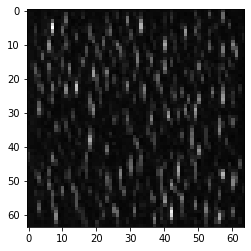

In [29]:
genrated_image(5)

In [30]:
genrated_confidence(5)

tensor([[0.0654, 0.0331, 0.0167, 0.0153, 0.0074, 0.0325, 0.0529, 0.0217, 0.0120,
         0.0139, 0.0192, 0.0185, 0.0354, 0.0333, 0.0113, 0.0264, 0.0601, 0.0132,
         0.0122, 0.0242, 0.0162, 0.0258, 0.0117, 0.0402, 0.0158, 0.0100, 0.0708,
         0.0236, 0.0064, 0.0073, 0.0287, 0.0221, 0.0154, 0.0511, 0.0200, 0.0323,
         0.0464, 0.0124, 0.0117, 0.0075]], grad_fn=<SoftmaxBackward0>)


In [31]:
torch.save(generator.state_dict(), 'generator_1e-8.pt')